In [11]:
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [10]:
mb_size = 64   #Mini-batch size

def get_indices(dataset):
    indices =  []
    for i in range(len(dataset.targets)):  #use train_labels if error with tragets 
        if dataset.targets[i] == 2 or dataset.targets[i] == 4 or dataset.targets[i] == 6:
            indices.append(i)   #indices of data with labels 2, 4 or 6
    return indices

trainData = torchvision.datasets.MNIST('./data/', download=True, transform=transforms.ToTensor(), train=True)

idx = get_indices(trainData)
print(len(idx))

trainLoader = torch.utils.data.DataLoader(trainData,batch_size=mb_size, 
                                          sampler = torch.utils.data.sampler.SubsetRandomSampler(idx))

17718


In [51]:
# No. of training data = 17718

In [52]:
dataIter = iter(trainLoader)

imgs, labels = dataIter.next()

In [53]:
imgs.shape  #shape of the tensor data obtained from the train loader

torch.Size([64, 1, 28, 28])

In [54]:
#visualization of data on a grid
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

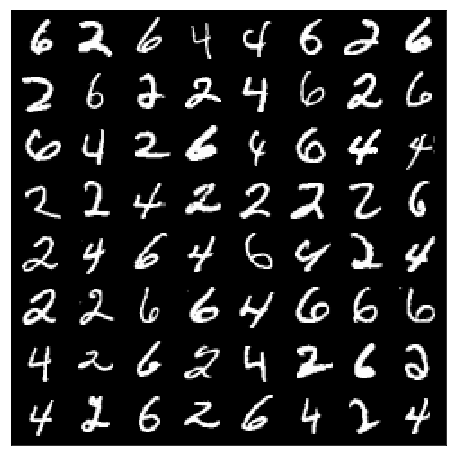

In [55]:
imshow(imgs) #using imshow() to obtain the grid

![Generative Adversarial Network](https://www.kdnuggets.com/wp-content/uploads/generative-adversarial-network.png)

In [56]:
Z_dim = 100  #size of the generated data
H_dim = 128  #no. of hidden neurons
X_dim = imgs.view(imgs.size(0), -1).size(1) #output neurons to generate an image

print(Z_dim, H_dim, X_dim)

100 128 784


In [57]:
#neural network for generative network
class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )
          
    def forward(self, input):
        return self.model(input)

In [58]:
G = Gen()

In [59]:
#neural network for discriminative model
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)

In [60]:
D = Dis()

In [61]:
#print the network architecture
print(G)
print(D)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [62]:
lr = 1e-3  #learning rate
#optimizers for both models
g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

Epoch:0,   G_loss:3.5788455874480927,    D_loss:0.3215267835420284


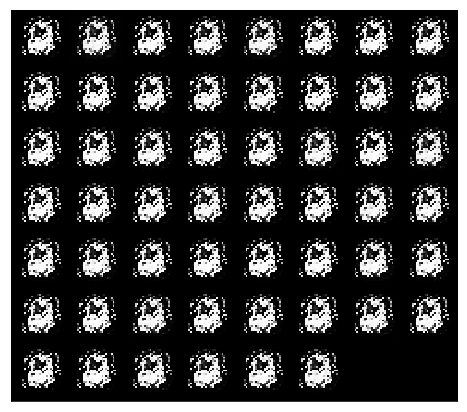

Epoch:1,   G_loss:4.532766560785176,    D_loss:0.07734533463224823


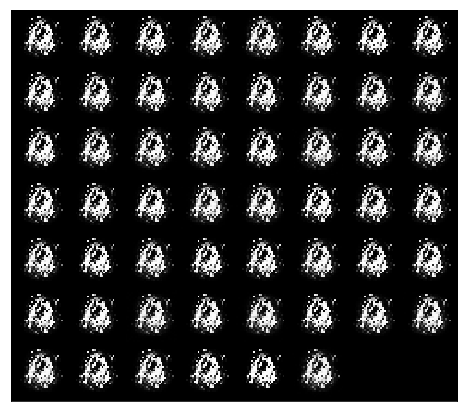

Epoch:2,   G_loss:5.6979623925384635,    D_loss:0.05973978882608431


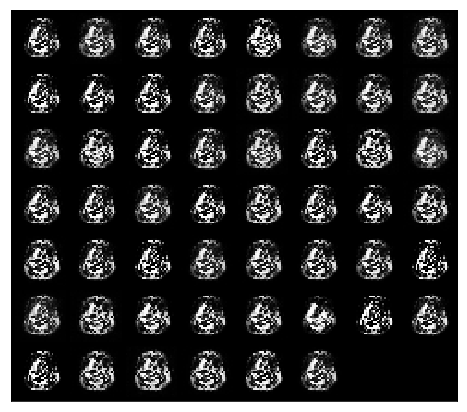

Epoch:3,   G_loss:3.909782117884942,    D_loss:0.16713955100719893


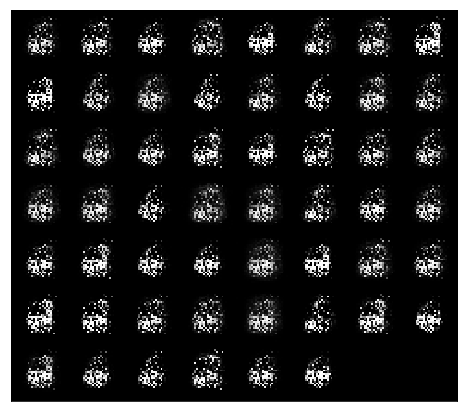

Epoch:4,   G_loss:4.648683000557689,    D_loss:0.09748934424525994


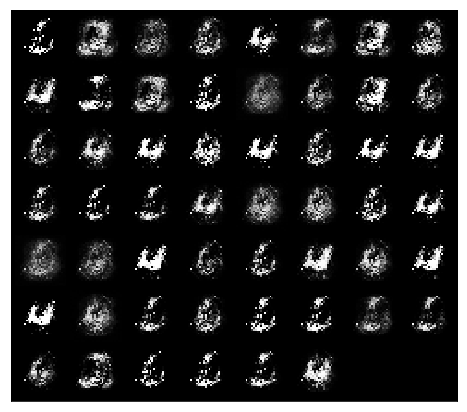

Epoch:5,   G_loss:4.1589867354300045,    D_loss:0.13803700309260228


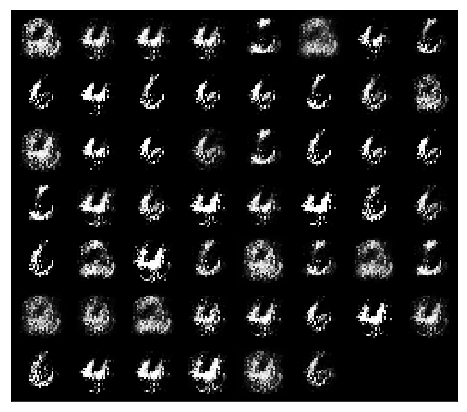

Epoch:6,   G_loss:4.024834770588238,    D_loss:0.17733959711092903


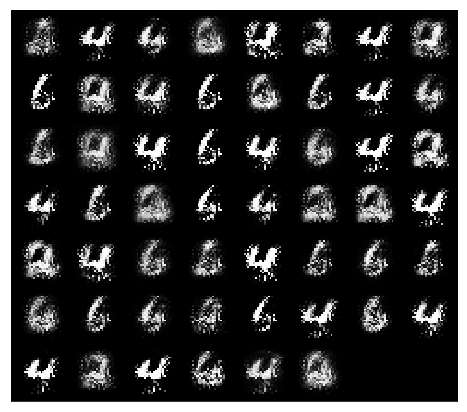

Epoch:7,   G_loss:3.8497540967989483,    D_loss:0.22628705472507202


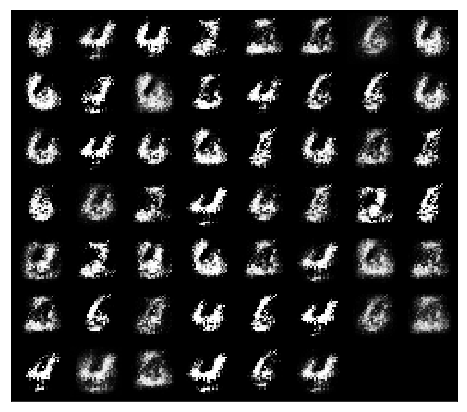

Epoch:8,   G_loss:4.4197124238479,    D_loss:0.2640853053772493


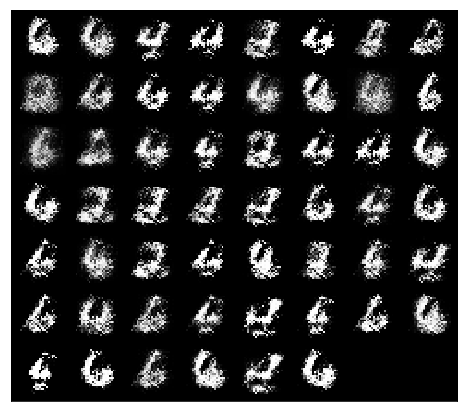

Epoch:9,   G_loss:4.686438190377577,    D_loss:0.3218683253987171


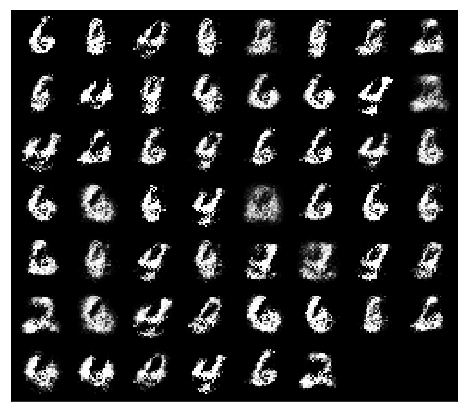

Epoch:10,   G_loss:4.809125472492259,    D_loss:0.3017679039214062


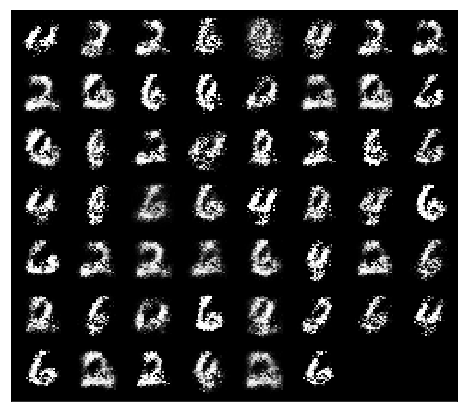

Epoch:11,   G_loss:3.9312985158569114,    D_loss:0.2928699090108544


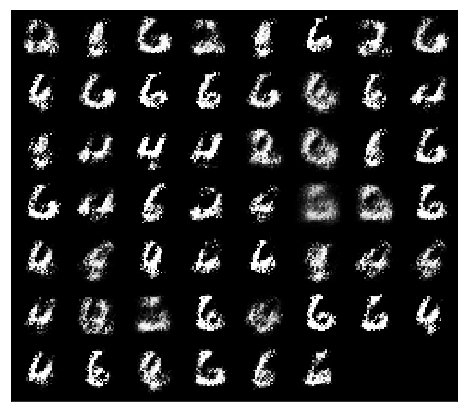

Epoch:12,   G_loss:3.7245611653861586,    D_loss:0.29730248125774333


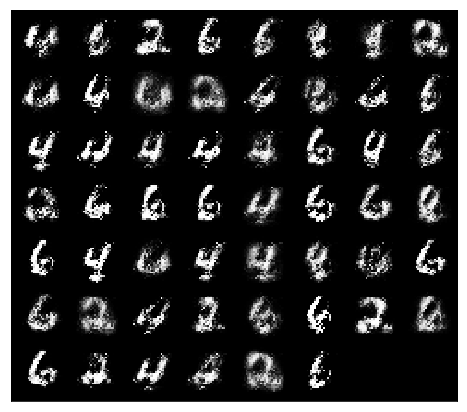

Epoch:13,   G_loss:3.4738409562231403,    D_loss:0.3349051974202752


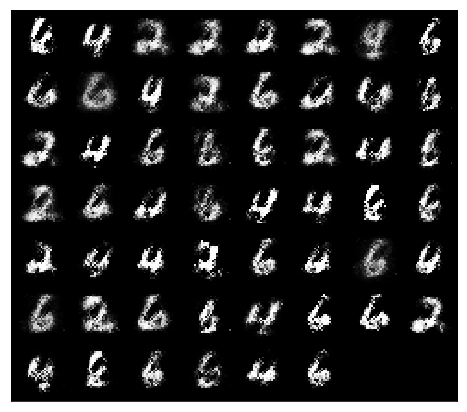

Epoch:14,   G_loss:3.2163475584037036,    D_loss:0.4270543678250123


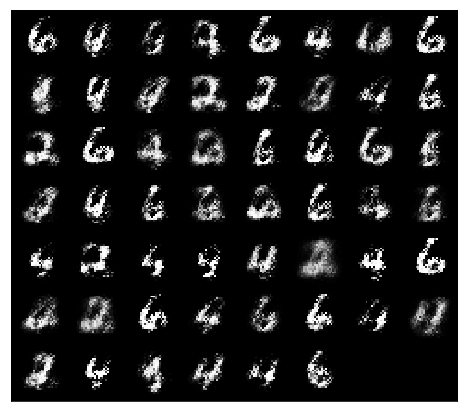

Epoch:15,   G_loss:3.3344437344409927,    D_loss:0.48194883500195584


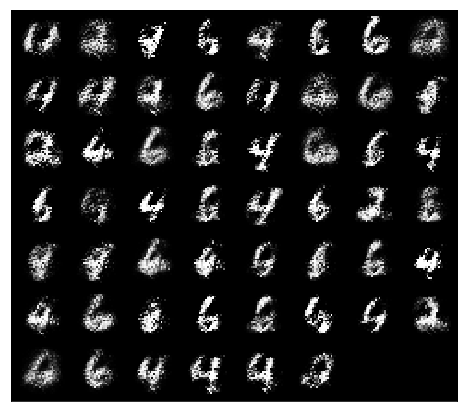

Epoch:16,   G_loss:3.204547796438747,    D_loss:0.5133062355785163


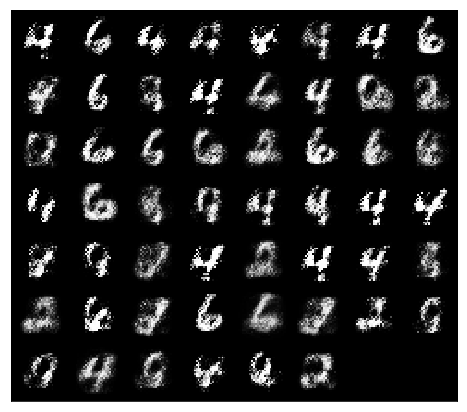

Epoch:17,   G_loss:3.0780294423499264,    D_loss:0.5041238931865037


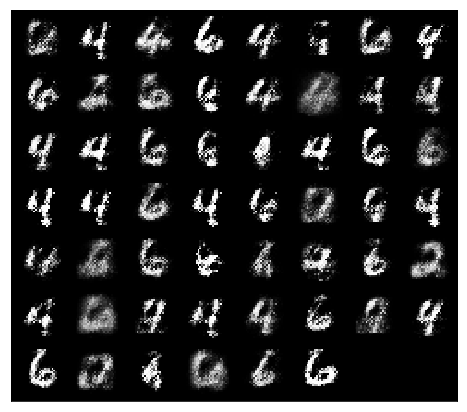

Epoch:18,   G_loss:2.785500150294941,    D_loss:0.5555595286486381


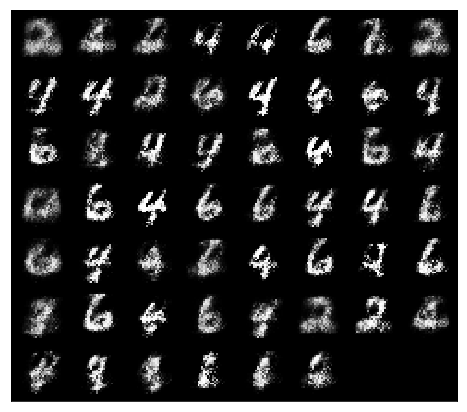

Epoch:19,   G_loss:2.900868827255194,    D_loss:0.6670001748451687


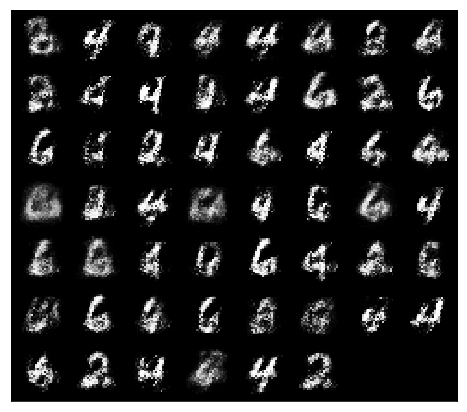

Epoch:20,   G_loss:2.8639570948018926,    D_loss:0.6663132561673326


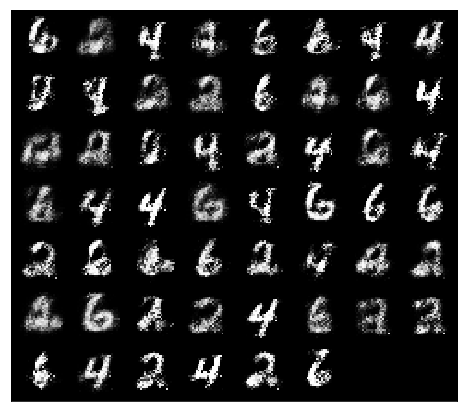

Epoch:21,   G_loss:2.7566506569996636,    D_loss:0.7264731784589884


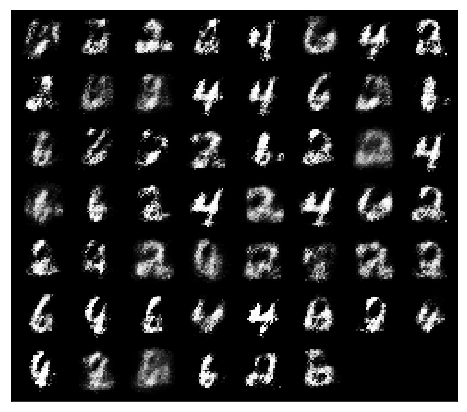

Epoch:22,   G_loss:2.639265888434455,    D_loss:0.7725008542141759


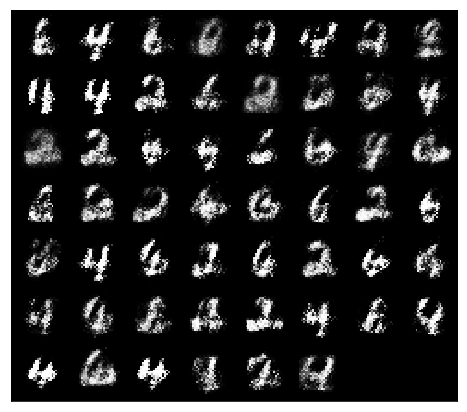

Epoch:23,   G_loss:2.8827043418849847,    D_loss:0.7414749908102979


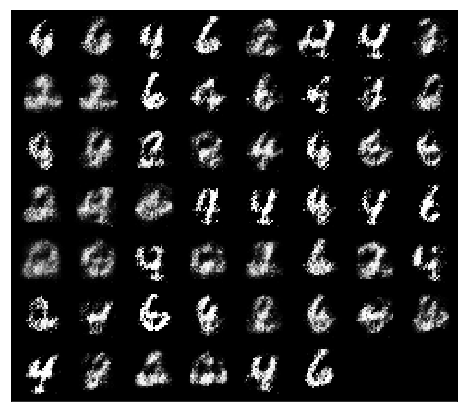

Epoch:24,   G_loss:3.1865565897325316,    D_loss:0.7211076125556382


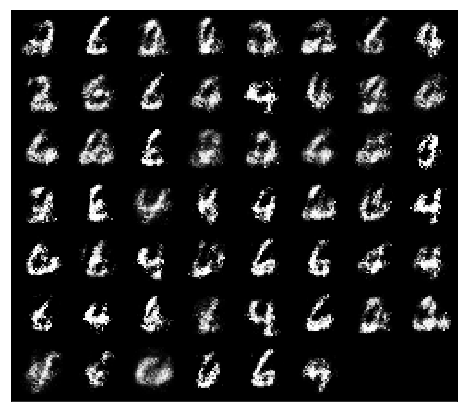

Epoch:25,   G_loss:2.9935662462392867,    D_loss:0.7896757913410448


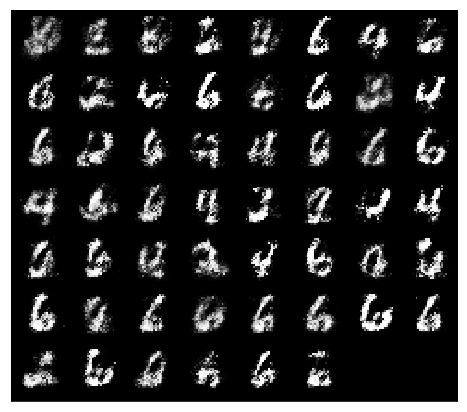

Epoch:26,   G_loss:2.780538153992663,    D_loss:0.7522616481092432


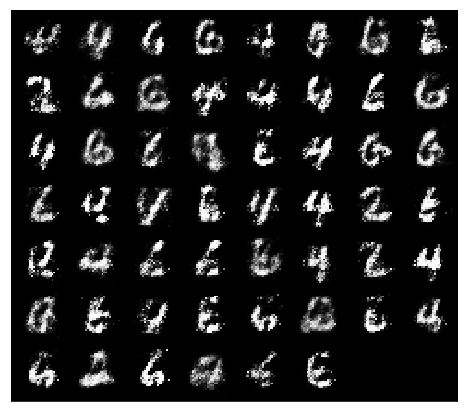

Epoch:27,   G_loss:2.5293036006417946,    D_loss:0.8019185222228081


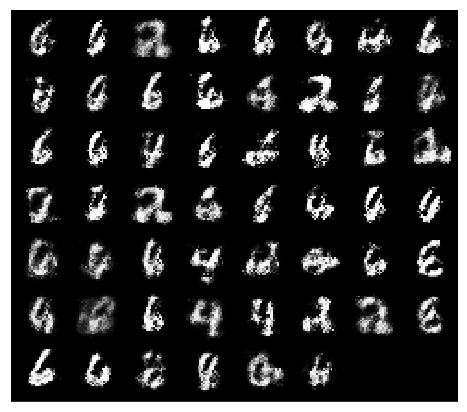

Epoch:28,   G_loss:2.4333966256048707,    D_loss:0.8549361760435552


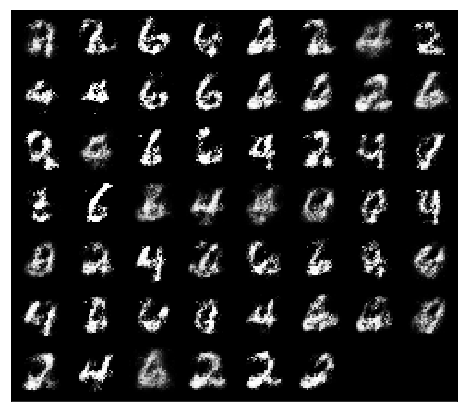

Epoch:29,   G_loss:2.304287135816223,    D_loss:0.846462238243771


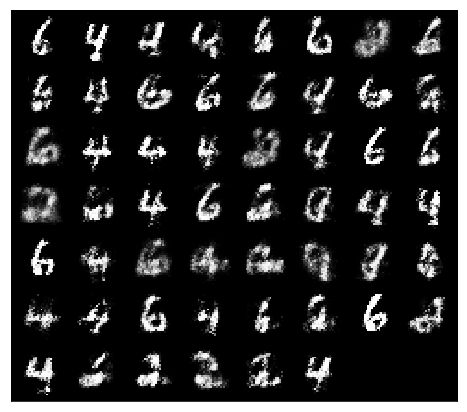

Epoch:30,   G_loss:2.042072593520264,    D_loss:0.9850868281474613


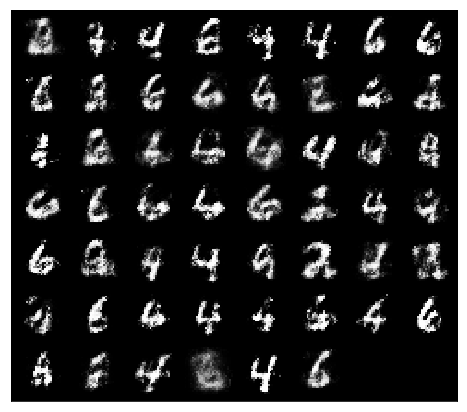

Epoch:31,   G_loss:1.9877066181885206,    D_loss:1.0572556501476342


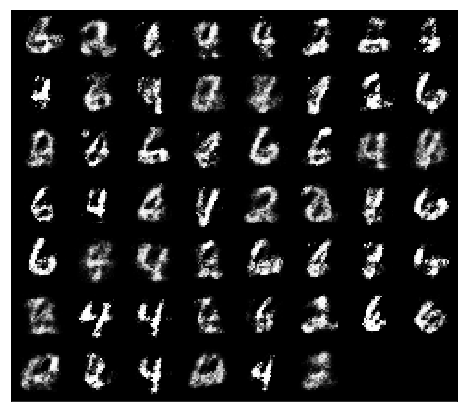

Epoch:32,   G_loss:2.02276662842031,    D_loss:0.9604215936109908


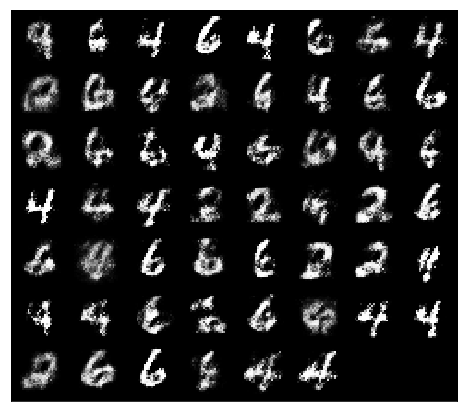

Epoch:33,   G_loss:2.0056177003288957,    D_loss:0.9839355136513279


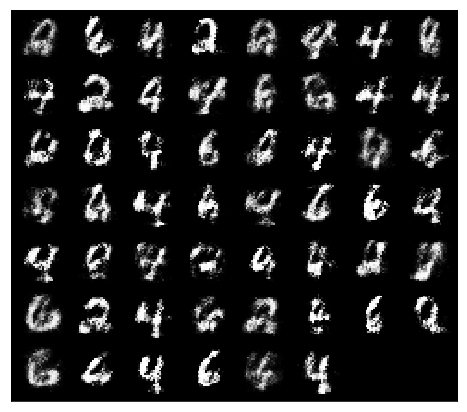

Epoch:34,   G_loss:2.068852816678126,    D_loss:0.9218553907174065


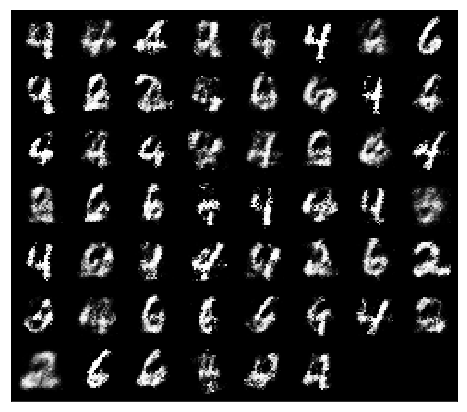

Epoch:35,   G_loss:2.0543217719246765,    D_loss:0.9097023195308038


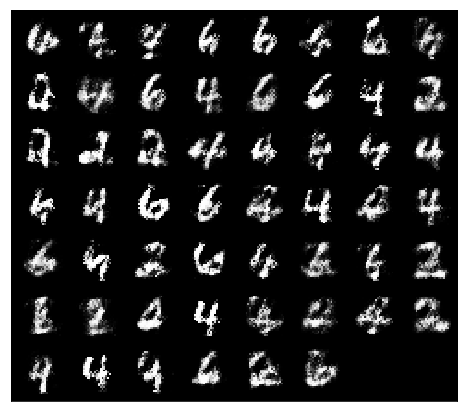

Epoch:36,   G_loss:2.019504093951697,    D_loss:0.9199487115071568


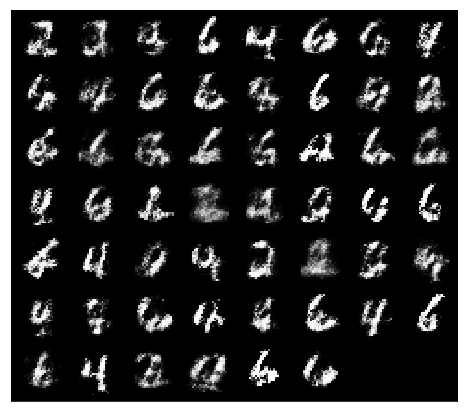

Epoch:37,   G_loss:1.7354817170959087,    D_loss:1.0016480862879151


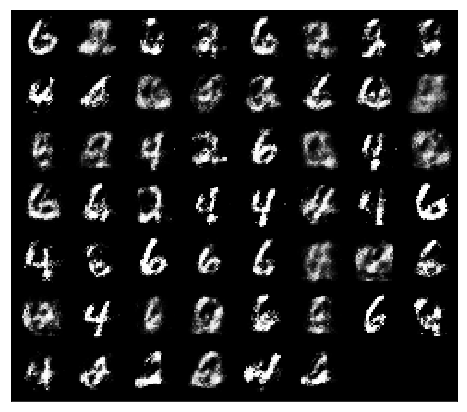

Epoch:38,   G_loss:1.7528951503739891,    D_loss:0.9516244963188034


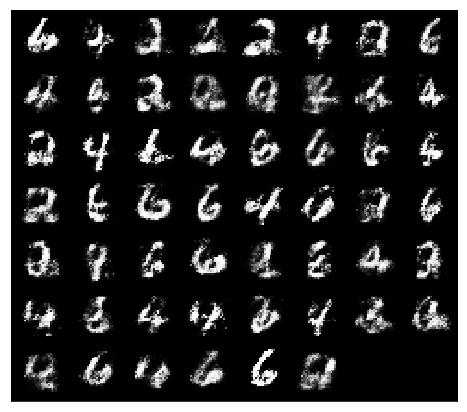

Epoch:39,   G_loss:1.8598368649878656,    D_loss:0.9636887301176463


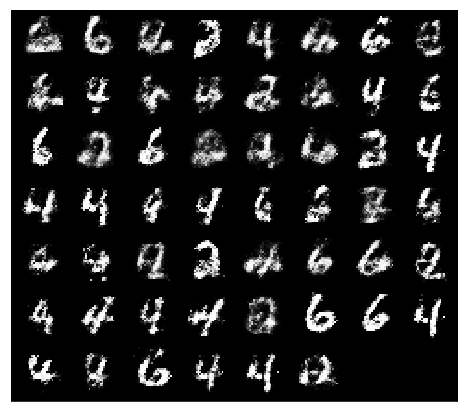

Epoch:40,   G_loss:1.8169748042895044,    D_loss:0.9752175726184776


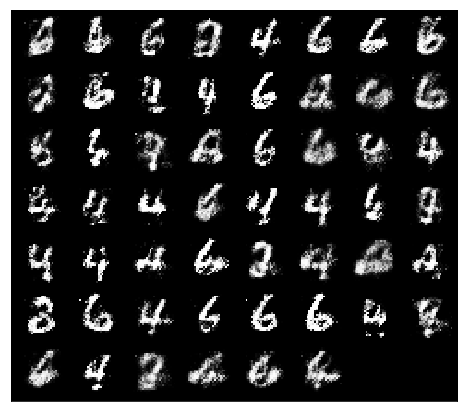

Epoch:41,   G_loss:1.9336766434920825,    D_loss:0.9146459083264485


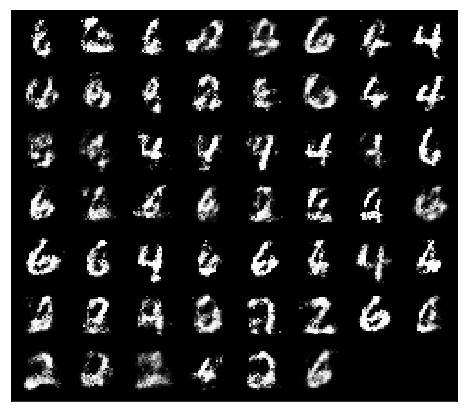

Epoch:42,   G_loss:1.7557036360248333,    D_loss:0.9983087500510233


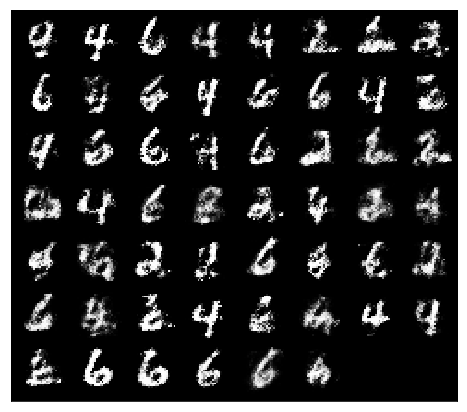

Epoch:43,   G_loss:1.8280010197567165,    D_loss:0.9174314464042334


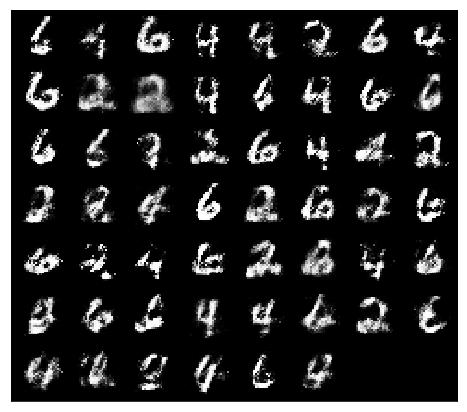

Epoch:44,   G_loss:1.6918370953966133,    D_loss:0.9910249484144824


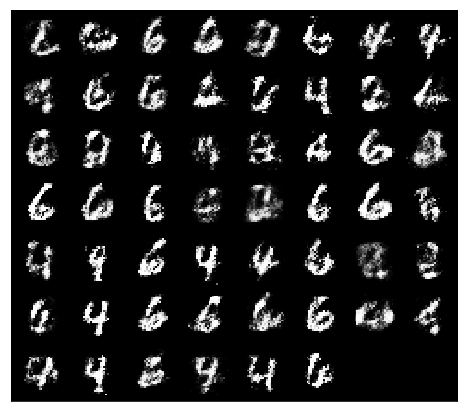

Epoch:45,   G_loss:1.9572079797083721,    D_loss:0.9010925437138829


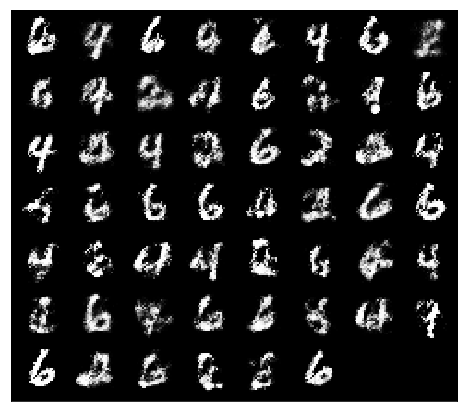

Epoch:46,   G_loss:1.8587440463179716,    D_loss:0.9325108222582711


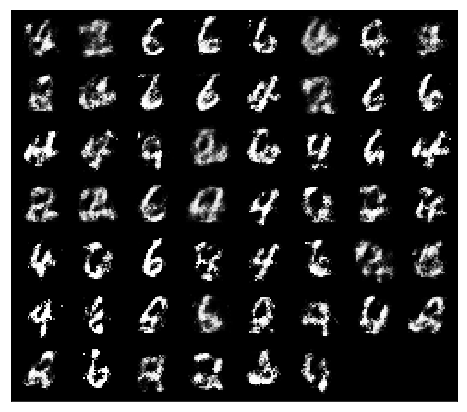

Epoch:47,   G_loss:1.7254020539431796,    D_loss:0.9784277933599286


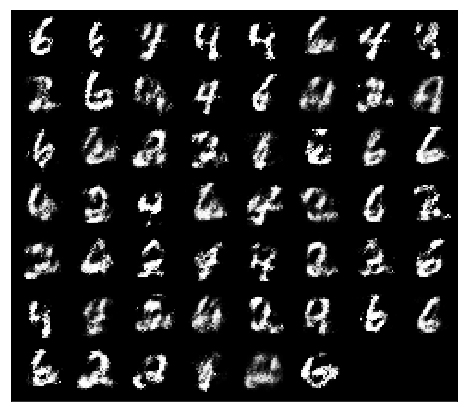

Epoch:48,   G_loss:1.6163547555462117,    D_loss:1.0395887988999433


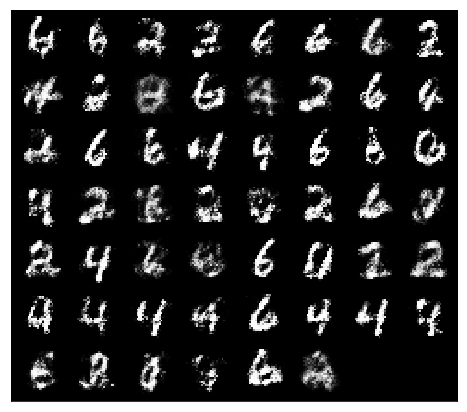

Epoch:49,   G_loss:1.643039330248368,    D_loss:0.9999539817713659


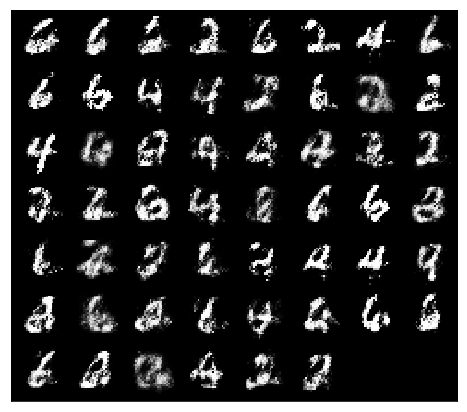

Epoch:50,   G_loss:1.709138048254626,    D_loss:0.9486312547745688


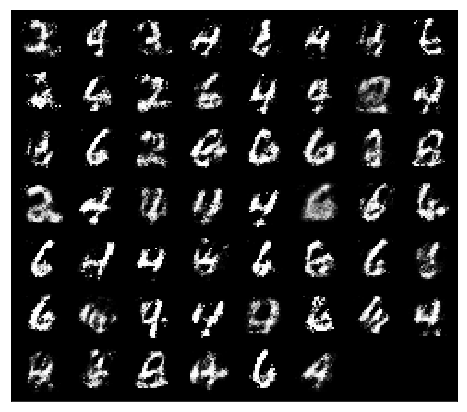

Epoch:51,   G_loss:1.6934690819750624,    D_loss:0.9767892771679572


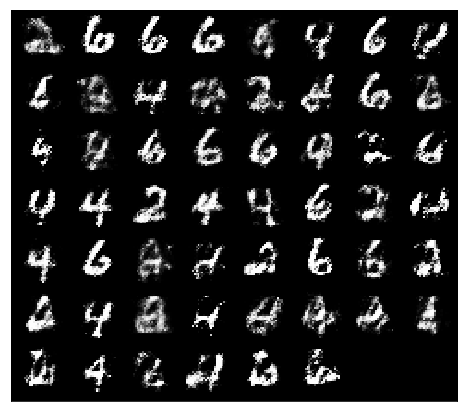

Epoch:52,   G_loss:1.6885626221391699,    D_loss:0.9716190332109748


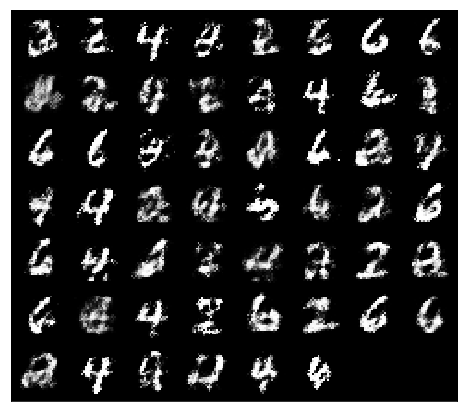

Epoch:53,   G_loss:1.6501336485039886,    D_loss:0.973721482263145


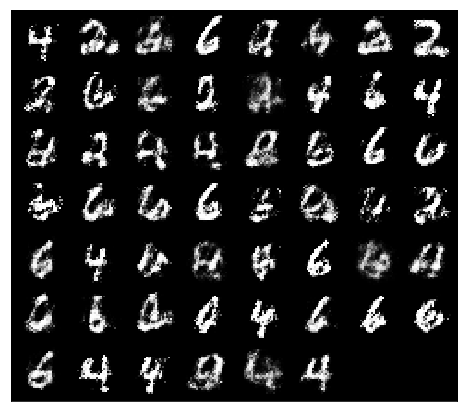

Epoch:54,   G_loss:1.7312675516527913,    D_loss:1.0001653226274014


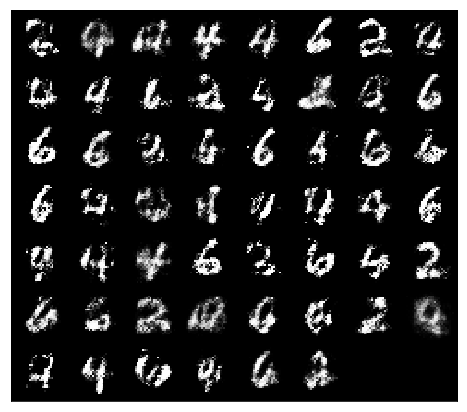

Epoch:55,   G_loss:1.7224948216861766,    D_loss:0.9438617872847547


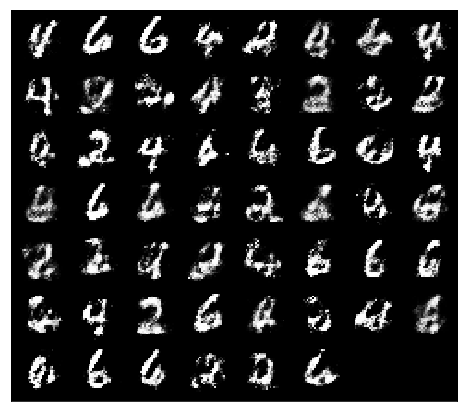

Epoch:56,   G_loss:1.648403063147507,    D_loss:1.00134734298348


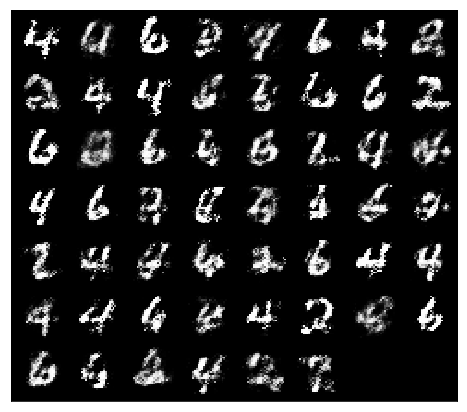

Epoch:57,   G_loss:1.6089980542014222,    D_loss:0.9863196850253356


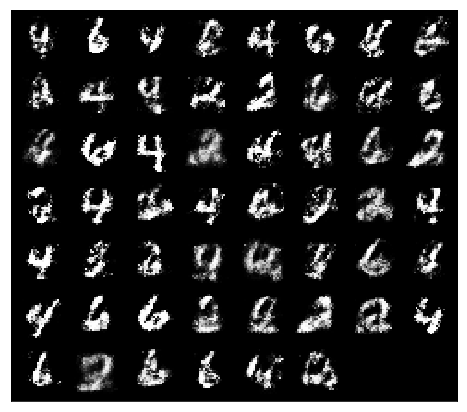

Epoch:58,   G_loss:1.708993520977695,    D_loss:0.9723636992141228


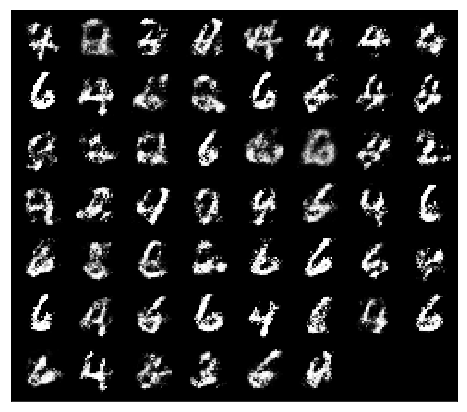

Epoch:59,   G_loss:1.6904445447646324,    D_loss:0.9546414874090615


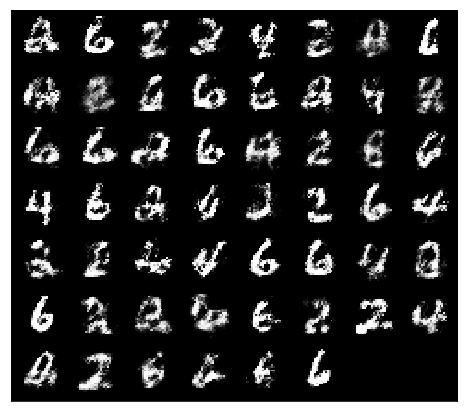

Epoch:60,   G_loss:1.6260196693537468,    D_loss:1.0003680726681374


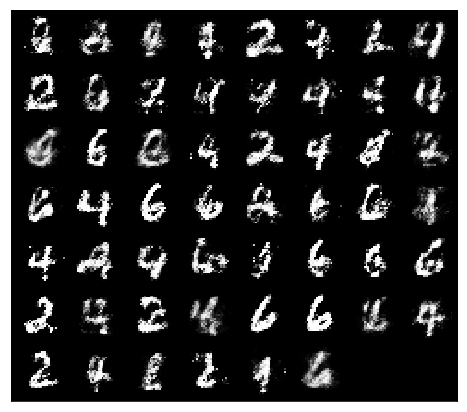

Epoch:61,   G_loss:1.6577524532049572,    D_loss:0.9952890436141499


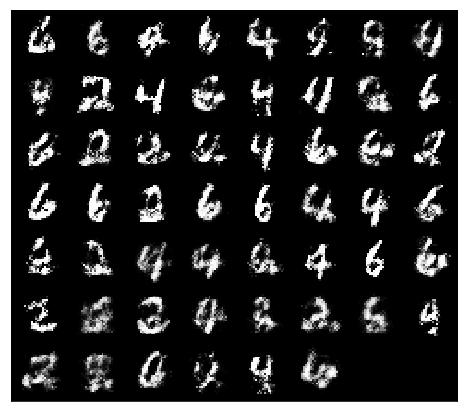

Epoch:62,   G_loss:1.687833672826471,    D_loss:0.9751683557506933


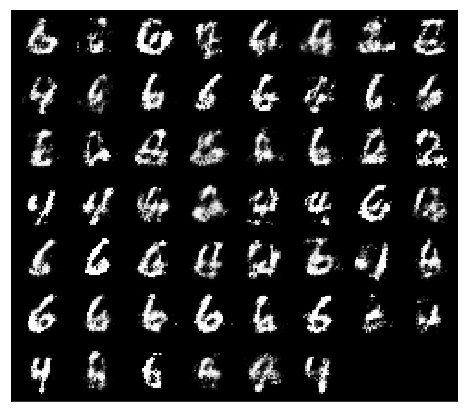

Epoch:63,   G_loss:1.596505557156642,    D_loss:1.0021645755974393


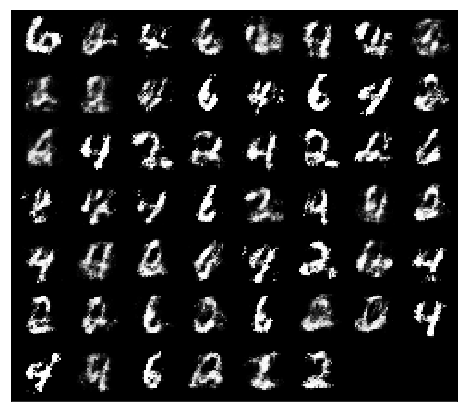

Epoch:64,   G_loss:1.522846605803562,    D_loss:1.0486981087643317


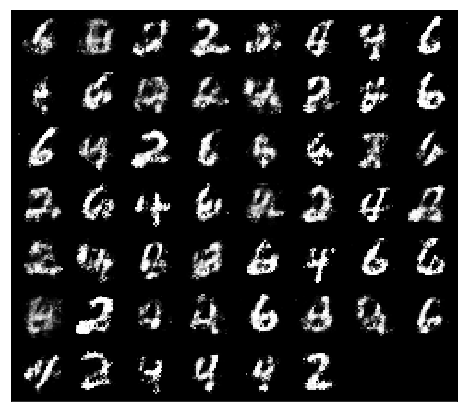

Epoch:65,   G_loss:1.6162430164185673,    D_loss:1.0114673221154333


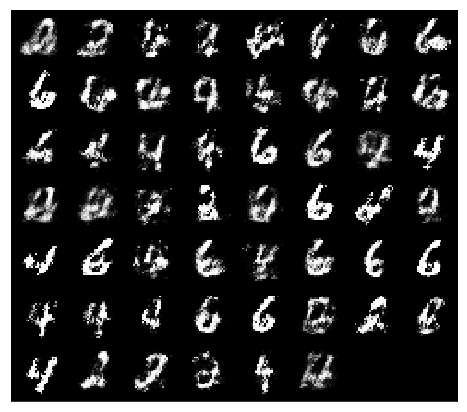

Epoch:66,   G_loss:1.6426703456506833,    D_loss:0.9960062221929915


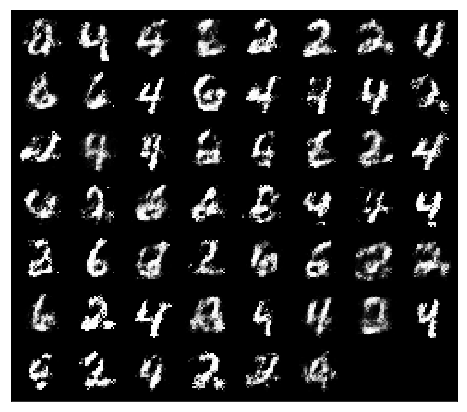

Epoch:67,   G_loss:1.5709683030090607,    D_loss:1.0493994443425203


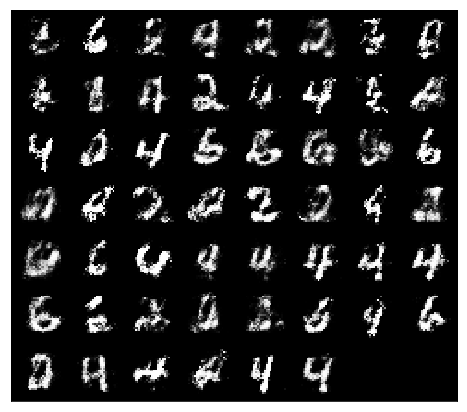

Epoch:68,   G_loss:1.5695035113324327,    D_loss:1.0470433177070066


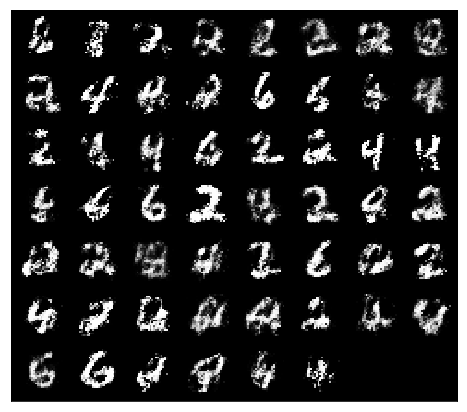

Epoch:69,   G_loss:1.5621683924637115,    D_loss:1.025652539213642


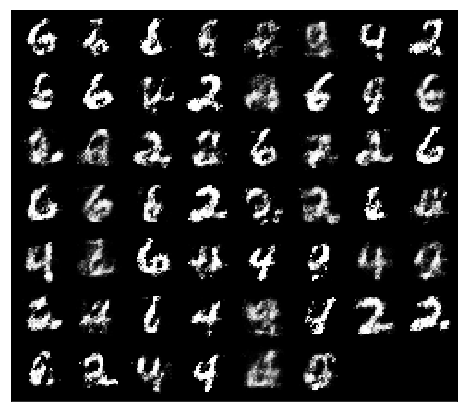

Epoch:70,   G_loss:1.5132046227851068,    D_loss:1.0514331432025785


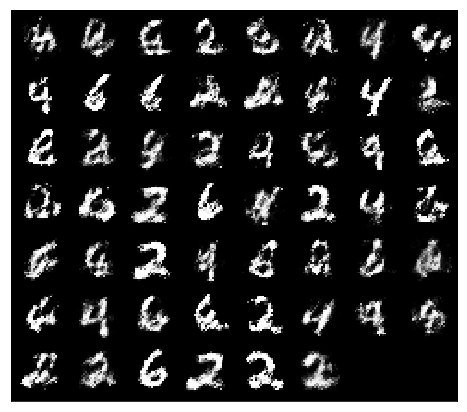

Epoch:71,   G_loss:1.5046594642129616,    D_loss:1.0672580668642202


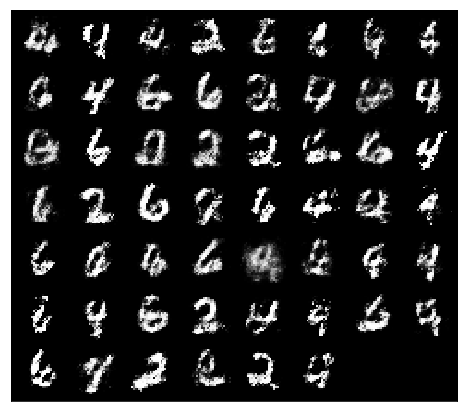

Epoch:72,   G_loss:1.4656299167591742,    D_loss:1.0616827006804814


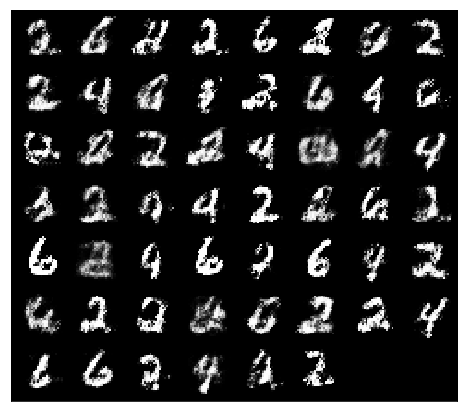

Epoch:73,   G_loss:1.451656416435104,    D_loss:1.0388173187682774


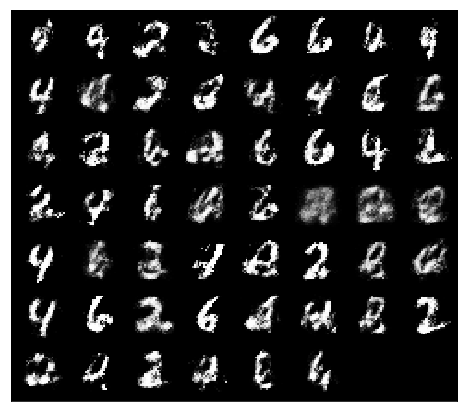

Epoch:74,   G_loss:1.3966676100066422,    D_loss:1.0748675633423594


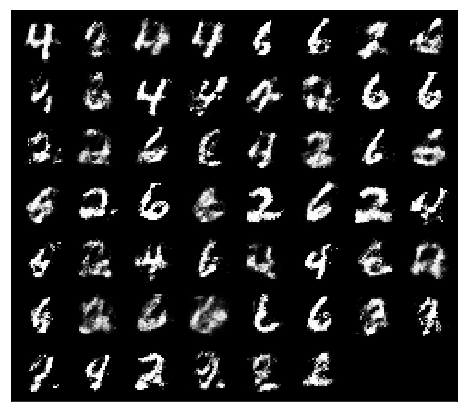

Epoch:75,   G_loss:1.4264202094250207,    D_loss:1.0589253007289734


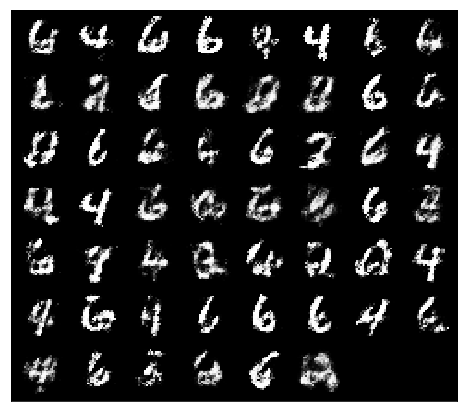

Epoch:76,   G_loss:1.3598630895253123,    D_loss:1.0469784964723277


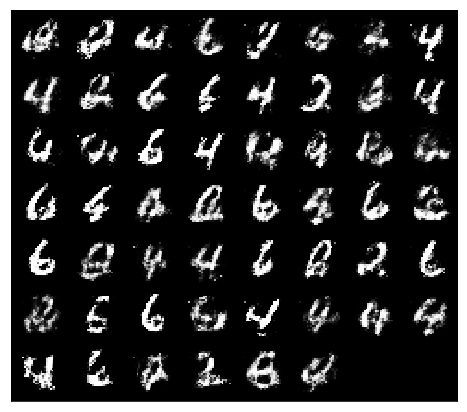

Epoch:77,   G_loss:1.3895747343125326,    D_loss:1.026990747193567


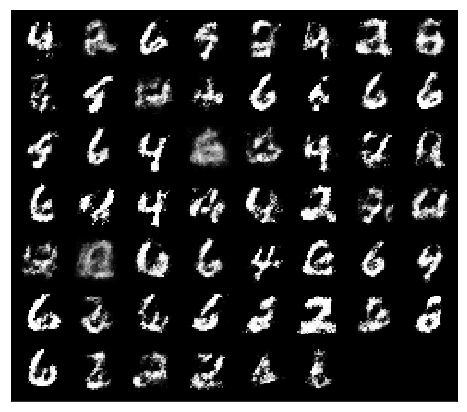

Epoch:78,   G_loss:1.4023685958841647,    D_loss:1.0355264832827158


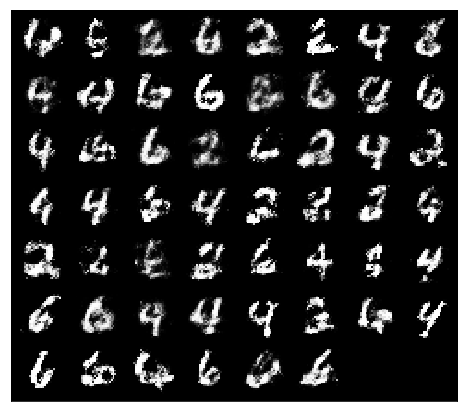

Epoch:79,   G_loss:1.4173911362348481,    D_loss:1.0255556653122608


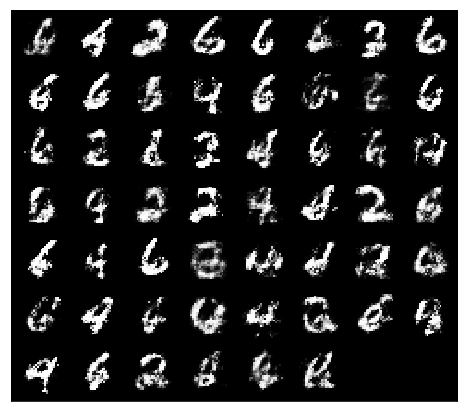

Epoch:80,   G_loss:1.387783754603527,    D_loss:1.0259953608151378


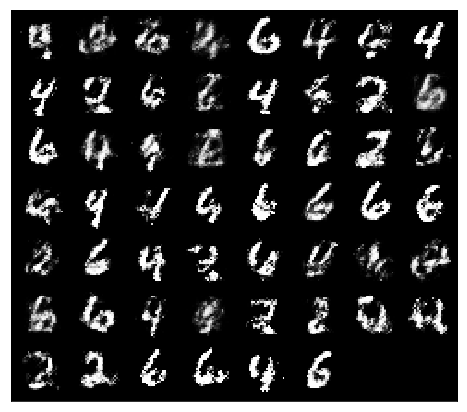

Epoch:81,   G_loss:1.398624556589643,    D_loss:1.0431814286252652


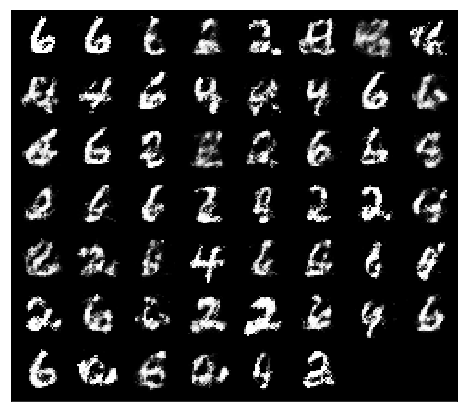

Epoch:82,   G_loss:1.3776489405855805,    D_loss:1.048334152044372


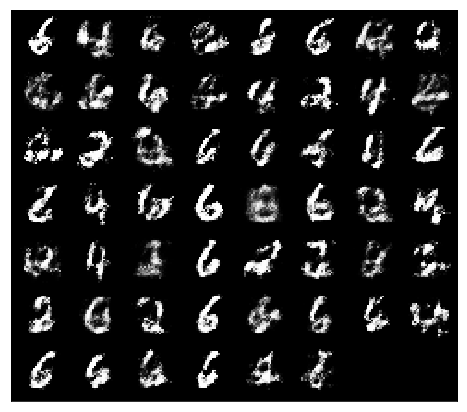

Epoch:83,   G_loss:1.3677966439767004,    D_loss:1.0590731871687549


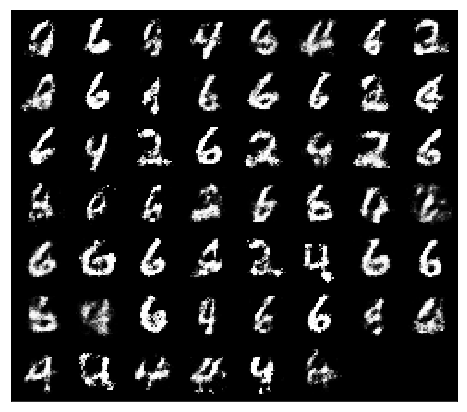

Epoch:84,   G_loss:1.309189422035906,    D_loss:1.0672977807719786


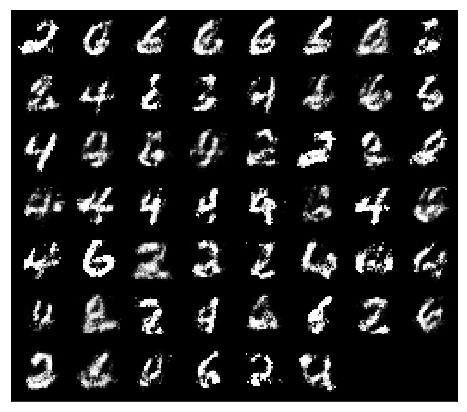

Epoch:85,   G_loss:1.3342439960486623,    D_loss:1.0593834362305459


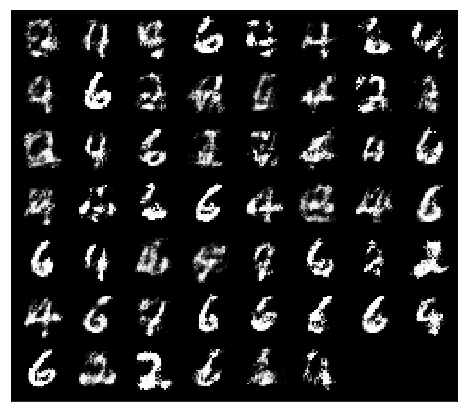

Epoch:86,   G_loss:1.349556698480668,    D_loss:1.064833391874706


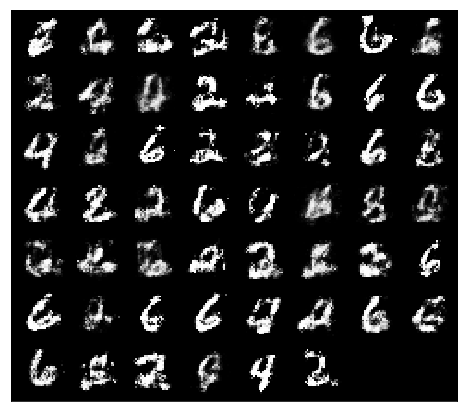

Epoch:87,   G_loss:1.3837613745286577,    D_loss:1.0395298316160264


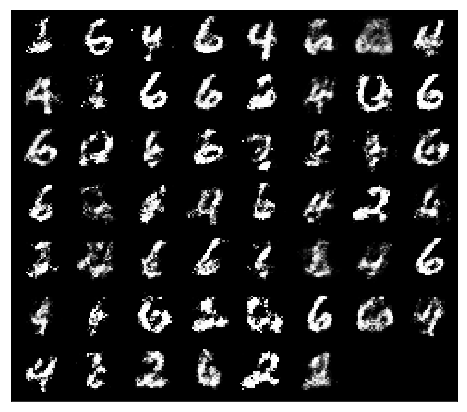

Epoch:88,   G_loss:1.438966442531627,    D_loss:1.0341785560876453


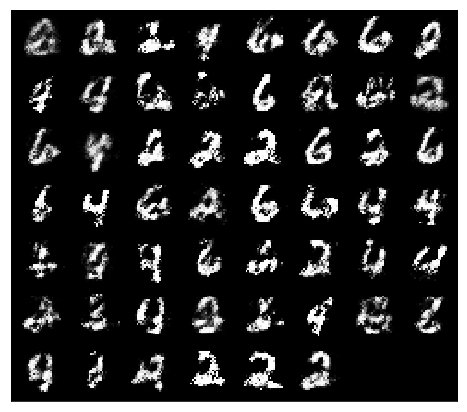

Epoch:89,   G_loss:1.3931910156773315,    D_loss:1.0792129810106024


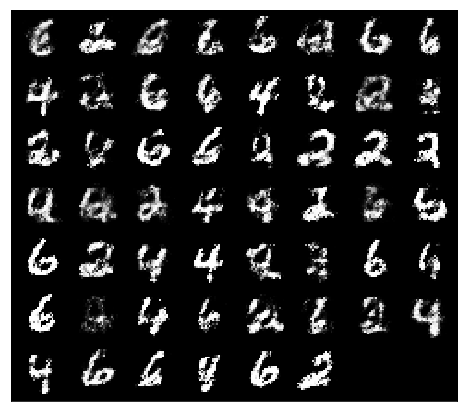

Epoch:90,   G_loss:1.4226715267780456,    D_loss:1.045936897773605


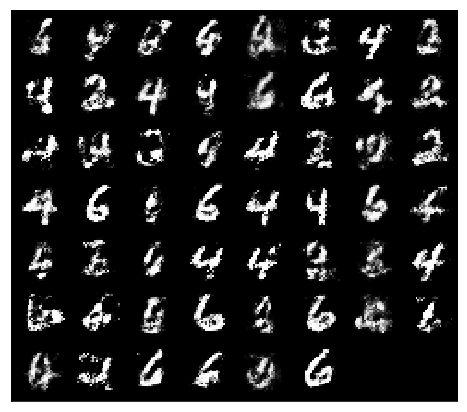

Epoch:91,   G_loss:1.3521908306472998,    D_loss:1.073860132522101


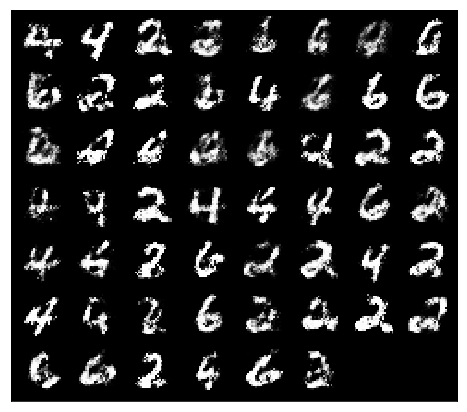

Epoch:92,   G_loss:1.3787523802867434,    D_loss:1.065891453290244


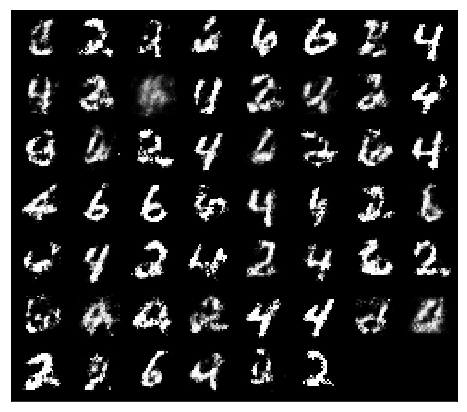

Epoch:93,   G_loss:1.3150981176200756,    D_loss:1.0801333505324078


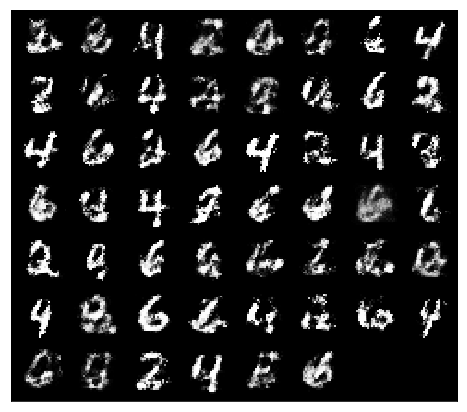

Epoch:94,   G_loss:1.3366455278672036,    D_loss:1.0443126972401615


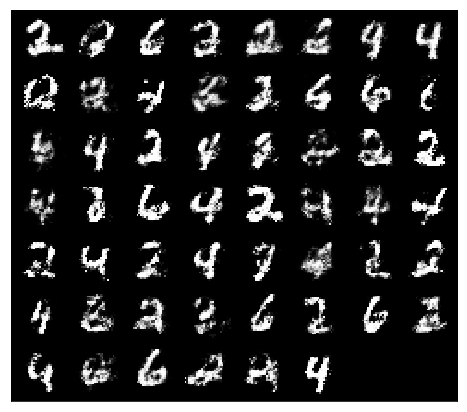

Epoch:95,   G_loss:1.3042997328382968,    D_loss:1.0575200142843197


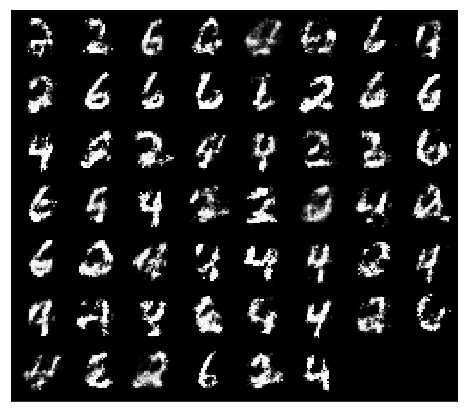

Epoch:96,   G_loss:1.3279585691995999,    D_loss:1.0396204399287916


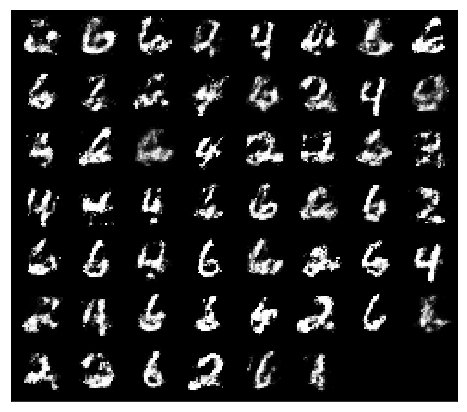

Epoch:97,   G_loss:1.308672275999393,    D_loss:1.0737788629876146


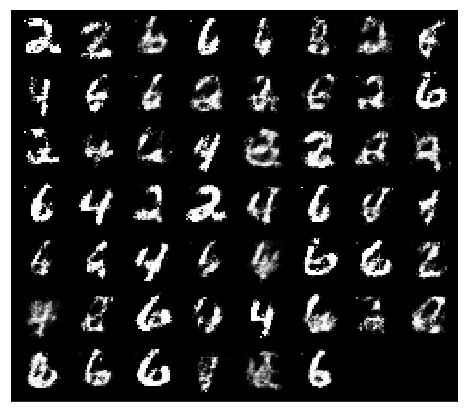

Epoch:98,   G_loss:1.3198325139090472,    D_loss:1.0544132347141362


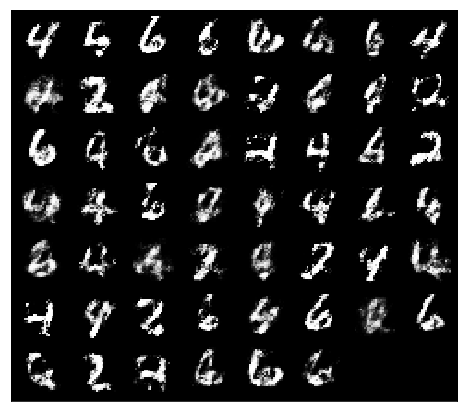

Epoch:99,   G_loss:1.3186990119489952,    D_loss:1.0763845250064286


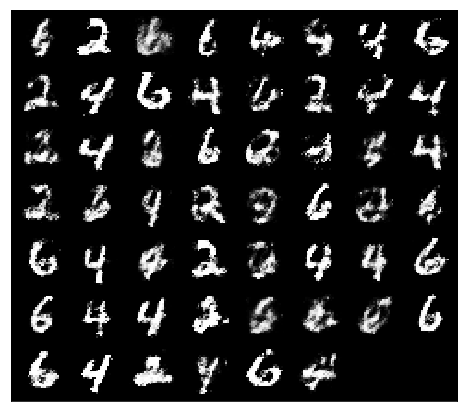

In [63]:
for epoch in range(100):
    G_loss_run = 0.0
    D_loss_run = 0.0
    
    for i, data in enumerate(trainLoader):
        X, _ = data
        X = X.view(X.size(0), -1)
        mb_size = X.size(0)
        
        one_labels = torch.ones(mb_size, 1)
        zero_labels = torch.zeros(mb_size, 1)
        
        z = torch.randn(mb_size, Z_dim)
        
        D_real = D(X)
        D_fake = D(G(z))
        
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)  #loss -(1/m)(log D(x))
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)  #loss -(1/m)(log(1-D(G(z))))
        D_loss = D_real_loss + D_fake_loss
        
        d_opt.zero_grad()
        D_loss.backward()
        d_opt.step()
        
        z = torch.randn(mb_size, Z_dim)
        
        D_fake = D(G(z))
        G_loss = F.binary_cross_entropy(D_fake, one_labels)  #loss -(1/m)(log (1-D(G(z))))
        
        g_opt.zero_grad()
        G_loss.backward()
        g_opt.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    print('Epoch:{},   G_loss:{},    D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
    
    with torch.no_grad():
        samples = G(z).detach()
        samples = samples.view(samples.size(0), 1, 28, 28)
        imshow(samples)

# Exercise

GANs can be used to generate fake celebrity face images using CelebA dataset http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html:
![CelebA dataset](https://pytorch.org/tutorials/_images/sphx_glr_dcgan_faces_tutorial_001.png)
Design a DCGAN using the following architecture: 
![Generative Adversarial Network](https://pytorch.org/tutorials/_images/dcgan_generator.png)

In [4]:
# Generator Code
nc = 3  # Number of channels in the training images. For color images this is 3
nz = 100  # Size of z latent vector (i.e. size of generator input)
ngf = 64  # Size of feature maps in generator

class DC_Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.model(input)

In [5]:
#Discriminator Code
ndf = 64  # Size of feature maps in discriminator

class DC_Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

In [6]:
DC_G = DC_Gen()
DC_D = DC_Dis()

print(DC_G)
print(DC_D)

DC_Gen(
  (model): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)
DC

Convert this architecture to suit the CIFAR10 dataset in PyTorch to use DCGAN to create images of one or more classes.
![cifar10 dataset](https://pytorch.org/tutorials/_images/cifar10.png)